--2020-11-24 05:18:12--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/organisms.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159777 (156K) [image/jpeg]
Saving to: ‘organisms.jpg’

organisms.jpg       100%[===================>] 156.03K  --.-KB/s    in 0.02s   

2020-11-24 05:18:12 (9.74 MB/s) - ‘organisms.jpg’ saved [159777/159777]



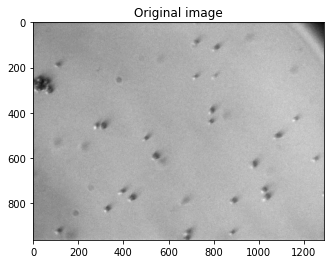

In [1]:
# The image below corresponds to a snapshot of single cell organisms observed with a microscope
import cv2
import matplotlib.pyplot as plt

!wget "https://raw.githubusercontent.com/Henry-Medeiros/images/master/organisms.jpg"
img = cv2.imread('organisms.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY, 0) 

# visualization only
plt.imshow(img, 'gray')
plt.title('Original image')
plt.show()

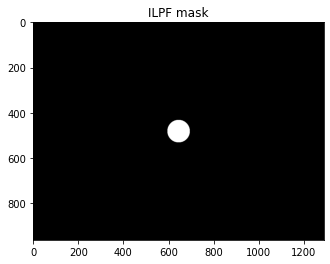

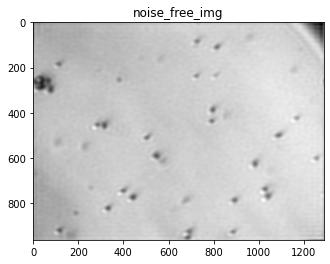

Text(0.5, 1.0, 'binarized_img')

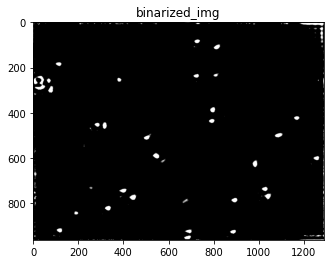

In [3]:
# Binarize the image to separate the organisms from the background
# Hint 1: You may need to remove some high-frequency noise from the image 
# before thresholding
# Hint 2: The background illumination in the image varies significantly, so a 
# single treshold for the entire will not work

import numpy as np

# building an Ideal Low Pass Filter
# get the shape of the img
dims = img.shape
d0 = 50

x = range(dims[1])
y = range(dims[0])
xv, yv = np.meshgrid(x, y)

# duv = d(u,v) which are the distances
duv = np.linalg.norm([xv - dims[1]/2, yv - dims[0]/2], axis=0)
# ilpf is a true or false filter at this point, it is either 1 or 0
ilpf_mask = duv < d0

# plot ILPF mask
plt.figure()
plt.imshow(255*ilpf_mask, 'gray')
plt.title('ILPF mask')
plt.show()

# take the Fourier Transform of the img
fft_img = np.fft.fft2(img)
# shift the fft_img to the center
shifted_fft_img = np.fft.fftshift(fft_img)
# apply the low pass filter on the shifted fft img
ilpf_fft_img = ilpf_mask * shifted_fft_img
# reconstruct img by taking the inverse Fourier trasnform of the unshifted img
recon_ilpf_fft_img = np.fft.ifft2(np.fft.ifftshift(ilpf_fft_img))

# the final img should be free of high frequency noise
noise_free_img = abs(recon_ilpf_fft_img)
plt.imshow(noise_free_img, 'gray')
plt.title('noise_free_img')
plt.show()

#using adaptive thresholding to deal with background illumination
binarized_img = cv2.adaptiveThreshold(noise_free_img.astype(np.uint8) , 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 27, 2)
plt.imshow(binarized_img, 'gray')
plt.title('binarized_img')

Text(0.5, 1.0, 'Organisms presented in the img')

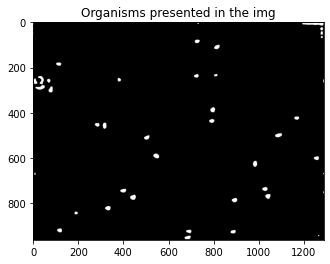

In [4]:
# Locate and plot the organisms present in the image
# Hint 3: You will need to apply a morphological filter to your binarized image 
# to remove spurious pixels left over by the binarization step
# morphological filter to close the objects

# create a kernel with dimension 5
se = np.ones((5,5), np.uint8)
# open img to leave only the organisms, since in my binarized img we could still see some small white areas that my by confused as organisms
open_img = cv2.morphologyEx(binarized_img, cv2.MORPH_OPEN, se)


#plot the organisms
plt.imshow(open_img,'gray')
plt.title('Organisms presented in the img')

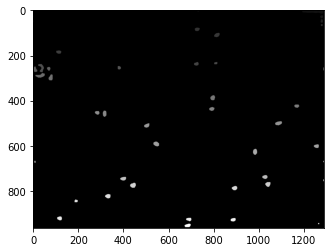

number of organisms = 45
total area in pixels of the organisms = 11443
average area per label = 254.2888888888889


In [6]:
# Count the the number of organisms present in the image and compute their 
# average area in pixels

from skimage.morphology import label
from skimage.measure import regionprops

# label the objects
img_labels, num = label(open_img, return_num=True)

# plot
plt.imshow(img_labels, 'gray')
plt.show()

# compute the total area of the labels by iterating through all the regions in img_labels
total = 0
img_props = regionprops(img_labels)
for organism in img_props:
  total = total + organism.area

# prints
print("number of organisms = {}".format(num))
print("total area in pixels of the organisms = {}".format(total))
print("average area per label = {}".format(total/num))